<a href="https://colab.research.google.com/github/derivai7/PCVK_Ganjil_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM**

In [1]:
# Import library
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os

from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time
import numpy as np
import cv2

import pickle
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam

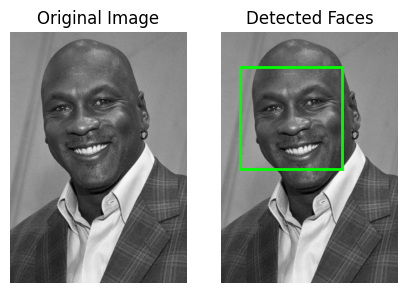

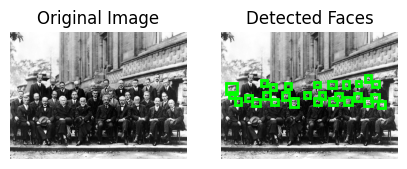

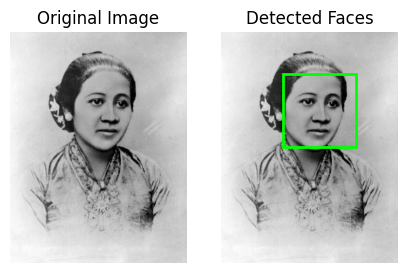

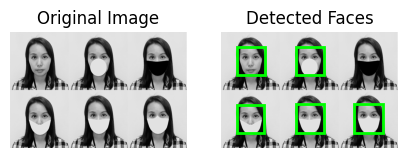

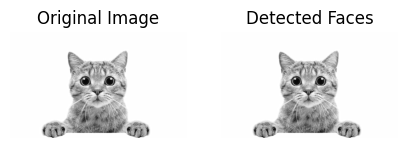

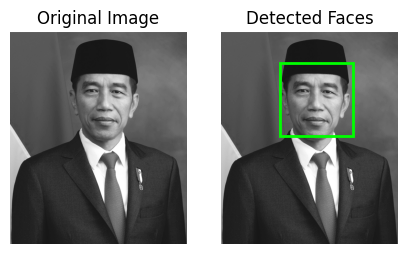

In [ ]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/dataset/haarcascades/haarcascade_frontalface_alt.xml')

# Path to the folder containing images
folder_path = '/content/drive/MyDrive/dataset/facedet'

# List of images to display
display_images = ['jokowi.jpg', 'kucing.jpg', 'kartini.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    # Check if the image is in the list of images to display
    if filename in display_images:
        # Create the full path to the image file
        filepath = os.path.join(folder_path, filename)

        # Read the input image
        img = cv2.imread(filepath)

        # Convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Display the original and detected image using matplotlib
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5))

        # Display the original grayscale image
        ax1.imshow(gray, cmap='gray')
        ax1.set_title('Original Image')
        ax1.axis('off')

        # Detect faces
        faces = face_cascade.detectMultiScale(gray)

        # Draw rectangle around the faces
        for (x, y, w, h) in faces:
            rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor=(0, 1, 0), facecolor='none')
            ax2.add_patch(rect)

        # Display the image with rectangles
        ax2.imshow(gray, cmap='gray')
        ax2.set_title('Detected Faces')
        ax2.axis('off')

        # Show the plot
        plt.show()

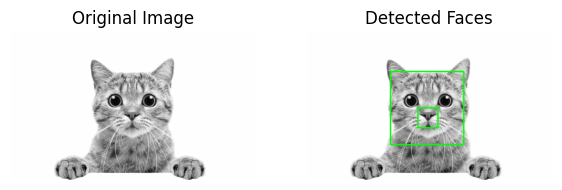

In [ ]:
# Load the cascade for cat faces
cat_face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/dataset/haarcascades/haarcascade_frontalcatface_extended.xml')

# Read the input image in grayscale
original_image_gray = cv2.imread('/content/drive/MyDrive/dataset/facedet/kucing.jpg', cv2.IMREAD_GRAYSCALE)

# Convert grayscale image to RGB for displaying with rectangles
original_image_rgb = cv2.cvtColor(original_image_gray, cv2.COLOR_GRAY2RGB)

# Detect cat faces
cat_faces = cat_face_cascade.detectMultiScale(original_image_gray)

# Draw rectangle around the cat faces
for (x, y, w, h) in cat_faces:
    cv2.rectangle(original_image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 3)

# Display the original and detected images
fig, axes = plt.subplots(1, 2, figsize=(7, 7))

# Display the original image
axes[0].imshow(original_image_gray, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the image with rectangles
axes[1].imshow(original_image_rgb, cmap='gray')
axes[1].set_title('Detected Faces')
axes[1].axis('off')

plt.show()

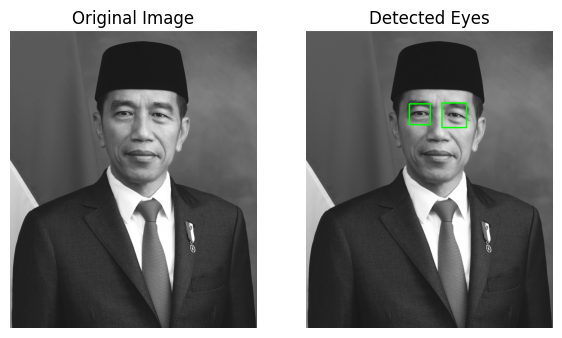

In [ ]:
# Load the cascade for eye detection
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/dataset/haarcascades/haarcascade_eye.xml')

# Read the input image in grayscale
original_image_gray = cv2.imread('/content/drive/MyDrive/dataset/facedet/jokowi.jpg', cv2.IMREAD_GRAYSCALE)

# Convert grayscale image to RGB for displaying with rectangles
original_image_rgb = cv2.cvtColor(original_image_gray, cv2.COLOR_GRAY2RGB)

# Detect eyes
eyes = eye_cascade.detectMultiScale(original_image_gray)

# Draw rectangle around the eyes
for (x, y, w, h) in eyes:
    cv2.rectangle(original_image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 3)

# Display the original and detected images
fig, axes = plt.subplots(1, 2, figsize=(7, 7))

# Display the original image
axes[0].imshow(original_image_gray, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the image with rectangles around eyes
axes[1].imshow(original_image_rgb, cmap='gray')
axes[1].set_title('Detected Eyes')
axes[1].axis('off')

plt.show()

<IPython.core.display.Javascript object>

(480, 640)
Saved to Bahtiar_Face.jpg


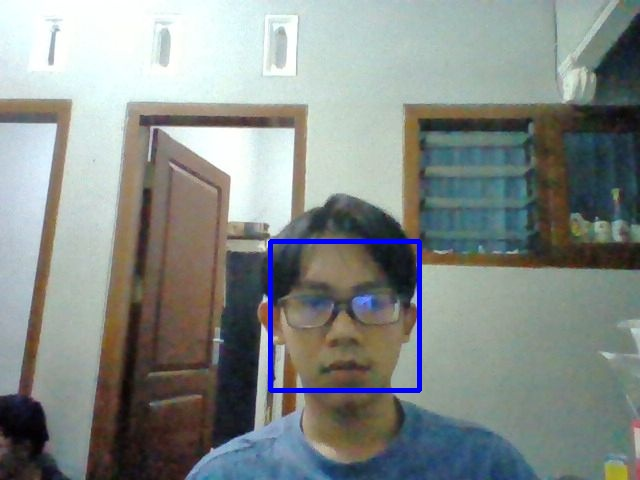

In [ ]:
def js_to_image(js_reply):
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

def bbox_to_bytes(bbox_array):
    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
    iobuf = io.BytesIO()
    bbox_PIL.save(iobuf, format='png')
    bbox_bytes = 'data:image/png;base64,{}'.format(str(b64encode(iobuf.getvalue()), 'utf-8'))
    return bbox_bytes

face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/dataset/haarcascades/haarcascade_frontalface_alt.xml')

def take_photo(filename='zalna.jpg', quality=0.8):
    js_code = '''
        async function takePhoto(quality) {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = 'Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({ video: true });

          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          // Resize the output to fit the video element.
          google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

          // Wait for Capture to be clicked.
          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getVideoTracks()[0].stop();
          div.remove();
          return canvas.toDataURL('image/jpeg', quality);
        }
    '''
    display(Javascript(js_code))

    # Get photo data
    data = eval_js('takePhoto({})'.format(quality))
    # Get OpenCV format image
    img = js_to_image(data)
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    print(gray.shape)
    # Detect face bounding box using Haar Cascade
    faces = face_cascade.detectMultiScale(gray)
    # Draw face bounding box on the image
    for (x, y, w, h) in faces:
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)
    # Save the image
    cv2.imwrite(filename, img)

    return filename

try:
    captured_filename = take_photo('Bahtiar_Face.jpg')
    print('Saved to {}'.format(captured_filename))

    # Show the captured image
    display(Image(captured_filename))
except Exception as err:
    print(str(err))

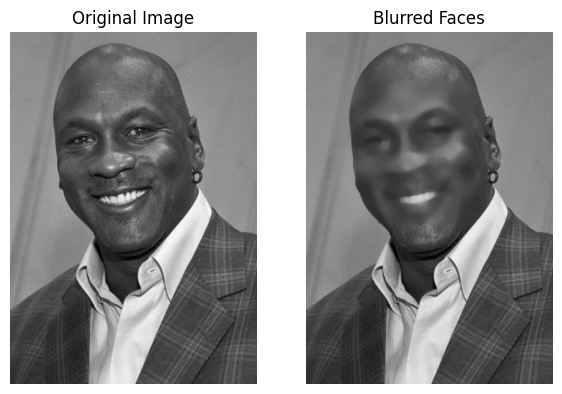

In [ ]:
# Read the input image in grayscale
input_image_gray = cv2.imread('/content/drive/MyDrive/dataset/facedet/mjordan.jpg', cv2.IMREAD_GRAYSCALE)

# Convert grayscale image to RGB for displaying with rectangles
input_image_rgb = cv2.cvtColor(input_image_gray, cv2.COLOR_GRAY2RGB)

# Detect faces
faces = face_cascade.detectMultiScale(input_image_gray)

# Apply blurring to detected faces
for (x, y, w, h) in faces:
    face_region = input_image_rgb[y:y+h, x:x+w]
    blurred_face_region = cv2.medianBlur(face_region, 15)
    input_image_rgb[y:y+h, x:x+w] = blurred_face_region

# Display the original and detected images
fig, axes = plt.subplots(1, 2, figsize=(7, 7))

# Display the original image
axes[0].imshow(input_image_gray, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the image with blurred faces
axes[1].imshow(input_image_rgb, cmap='gray')
axes[1].set_title('Blurred Faces')
axes[1].axis('off')

plt.show()

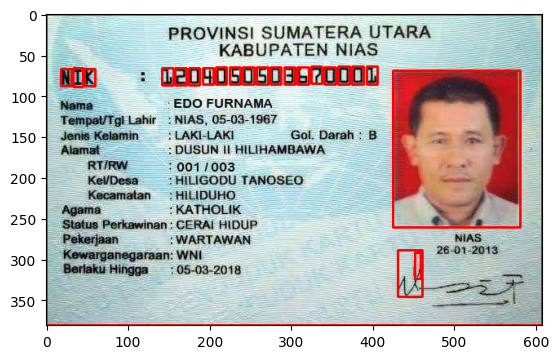

In [ ]:
image = cv2.imread('/content/drive/MyDrive/dataset/KTP More/ktp5.png')

blurred = cv2.GaussianBlur(image, (5, 5), 0.5)
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 30 and w >= 5 and float(ras) <= 2:
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 20 and w >= 5 and float(ras) <= 3:
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

ktp_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(ktp_rgb)
plt.show()

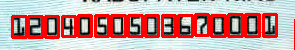

In [ ]:
image_croped = image[50:100, 130:425]
cv2_imshow(image_croped)

In [2]:
# Load MNIST dataset
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Number of samples to be taken from each category
num_samples_per_class = 100

# List of digits to be extracted (0 to 9)
digits_to_extract = list(range(10))

# Function to extract samples from each category
def extract_samples(images, labels, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(labels == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(images[i], digit) for i in selected_indices])
    return samples

# Extract samples from each category
training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)

# Shuffle the data
np.random.shuffle(training_data)

# Separate features and labels
features, labels = zip(*training_data)

# Convert to numpy array
features = np.array(features).reshape(-1, 28, 28, 1)

# Write to pickle files
with open("X_mnist.pickle", "wb") as pickle_out:
    pickle.dump(features, pickle_out)

with open("Y_mnist.pickle", "wb") as pickle_out:
    pickle.dump(to_categorical(labels, num_classes=10), pickle_out)

11490434/11490434 [==============================] - 1s 0us/step


In [44]:
# Load pickle files
with open("X_mnist.pickle", "rb") as pickle_in:
    X = pickle.load(pickle_in)

with open("Y_mnist.pickle", "rb") as pickle_in:
    Y = pickle.load(pickle_in)

width, height = 28, 28  # Adjust according to MNIST image size

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flatten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flatten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(10, activation='softmax')(fc_layer)

adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('mnist_cnn_model.keras')

Epoch 1/20
32/32 [==============================] - 7s 70ms/step - loss: 4.6090 - accuracy: 0.2060
Epoch 2/20
32/32 [==============================] - 1s 45ms/step - loss: 1.3475 - accuracy: 0.5980
Epoch 3/20
32/32 [==============================] - 1s 30ms/step - loss: 0.7772 - accuracy: 0.7600
Epoch 4/20
32/32 [==============================] - 1s 30ms/step - loss: 0.5527 - accuracy: 0.8330
Epoch 5/20
32/32 [==============================] - 1s 30ms/step - loss: 0.4244 - accuracy: 0.8670
Epoch 6/20
32/32 [==============================] - 1s 38ms/step - loss: 0.3235 - accuracy: 0.8930
Epoch 7/20
32/32 [==============================] - 2s 51ms/step - loss: 0.2545 - accuracy: 0.9250
Epoch 8/20
32/32 [==============================] - 2s 50ms/step - loss: 0.1940 - accuracy: 0.9410
Epoch 9/20
32/32 [==============================] - 2s 52ms/step - loss: 0.1434 - accuracy: 0.9550
Epoch 10/20
32/32 [==============================] - 2s 52ms/step - loss: 0.1066 - accuracy: 0.9800
Epoch 11/

In [45]:
# Load pickle files
pickle_in = open("X_mnist.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y = pickle.load(pickle_in)

width, height = 28, 28  # Adjust according to MNIST image size

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flatten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flatten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(10, activation='softmax')(fc_layer)

adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('mnist_cnn_model.keras')

Epoch 1/20
32/32 [==============================] - 2s 30ms/step - loss: 5.5936 - accuracy: 0.2280
Epoch 2/20
32/32 [==============================] - 1s 31ms/step - loss: 1.3488 - accuracy: 0.5760
Epoch 3/20
32/32 [==============================] - 1s 30ms/step - loss: 0.8242 - accuracy: 0.7430
Epoch 4/20
32/32 [==============================] - 2s 48ms/step - loss: 0.5613 - accuracy: 0.8220
Epoch 5/20
32/32 [==============================] - 2s 51ms/step - loss: 0.3977 - accuracy: 0.8740
Epoch 6/20
32/32 [==============================] - 2s 49ms/step - loss: 0.3091 - accuracy: 0.9100
Epoch 7/20
32/32 [==============================] - 2s 51ms/step - loss: 0.2407 - accuracy: 0.9480
Epoch 8/20
32/32 [==============================] - 2s 51ms/step - loss: 0.1772 - accuracy: 0.9660
Epoch 9/20
32/32 [==============================] - 1s 38ms/step - loss: 0.1352 - accuracy: 0.9740
Epoch 10/20
32/32 [==============================] - 1s 30ms/step - loss: 0.1104 - accuracy: 0.9740
Epoch 11/

32/32 [==============================] - 1s 21ms/step - loss: 2.2571 - accuracy: 0.9860
Accuracy on the test set: 98.60%


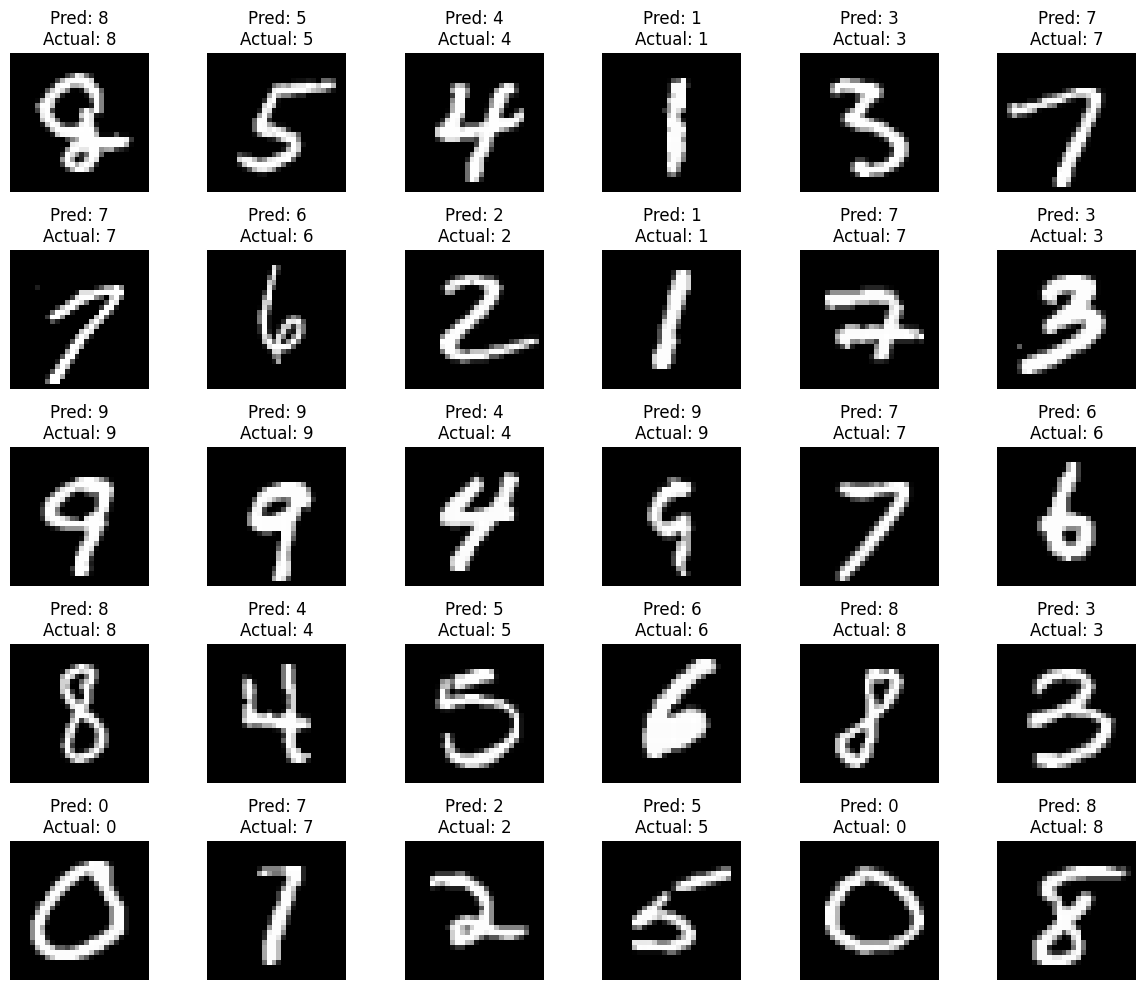

In [6]:
# Load the preprocessed MNIST dataset
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalize the testing data
X_test = X_test / 255.0

# Load the pre-trained model
model = tf.keras.models.load_model("mnist_cnn_model.h5")

# Perform predictions on the testing data
predictions = model.predict(X_test)

# Evaluate the model performance
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

import matplotlib.pyplot as plt

# Display 30 test results with their images
num_results_to_display = 30
fig, axes = plt.subplots(5, 6, figsize=(12, 10))

for i in range(num_results_to_display):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(Y_test[i])

    # Retrieve the image from the testing data
    img = X_test[i].reshape((28, 28))  # Assuming the images are 28x28 pixels

    # Display the image along with predicted and actual labels
    axes[i // 6, i % 6].imshow(img, cmap='gray')
    axes[i // 6, i % 6].set_title(f'Pred: {predicted_label}\nActual: {actual_label}')
    axes[i // 6, i % 6].axis('off')

plt.tight_layout()
plt.show()

In [9]:
# Install Tesseract
!sudo apt install tesseract-ocr

# Install pytesseract Python wrapper
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


NIK on the e-KTP (from the cropped region): 1204050503b70001



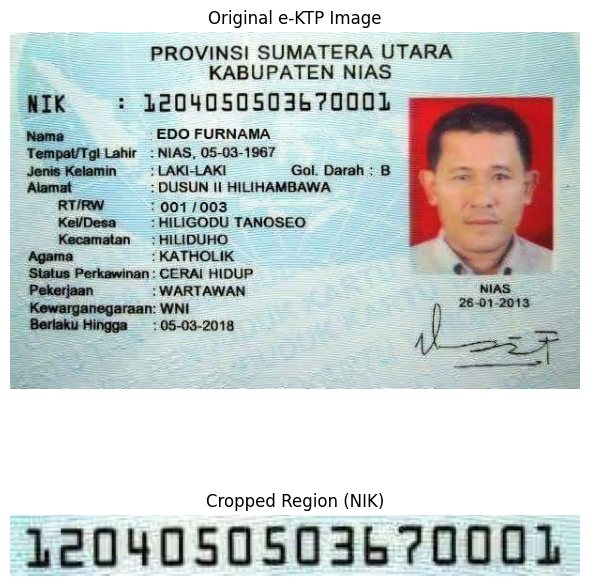

In [43]:
# Import library
import pytesseract
from PIL import Image

# Path to the e-KTP image
image_path = '/content/drive/MyDrive/dataset/KTP More/ktp5.png'

# Read the original image using OpenCV
img = cv2.imread(image_path)

# Display the original e-KTP image
plt.figure(figsize=(6, 8))
plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original e-KTP Image')
plt.axis('off')

# Crop the image to get the NIK region
cropped = img[60:90, 135:415]

# Convert the cropped image to grayscale
gray_cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)

# Perform thresholding (adjust as needed)
_, threshed_cropped = cv2.threshold(gray_cropped, 128, 255, cv2.THRESH_BINARY)

# Use Tesseract for OCR on the cropped image
result_cropped = pytesseract.image_to_string(Image.fromarray(threshed_cropped))

# Print the recognized NIK
print("NIK on the e-KTP (from the cropped region):", result_cropped)

# Display the cropped region
plt.subplot(2, 1, 2)
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.title('Cropped Region (NIK)')
plt.axis('off')

plt.tight_layout()
plt.show()